## Project Description

The project involves analyzing fuel consumption data from 2000 to 2022 across various vehicle makes, models, and classes. The primary goal is to assess trends in fuel efficiency, consumption rates, and emissions for diverse vehicle types. This analysis aims to support environmental impact assessments, identify shifts toward more fuel-efficient technologies, and guide policy recommendations for reducing emissions and improving fuel economy.

## Problem Statement

Fuel consumption and emissions from motor vehicles significantly contribute to environmental pollution and climate change. Despite advancements in vehicle technology, the adoption rate of fuel-efficient and eco-friendly vehicles remains inconsistent across different car manufacturers and classes. This project seeks to address the need for comprehensive insights into fuel consumption trends and emission rates to identify progress gaps and areas needing further innovation and policy support.

## Objectives

1. Analyze Trends: Evaluate trends in fuel consumption, efficiency (L/100 km), and emissions (CO2) from 2000 to 2022 across various vehicle classes.

2. Compare Efficiency: Identify top-performing vehicle models and classes with the lowest fuel consumption and emissions.

3. Assess Technological Impact: Examine how advancements in engine size, transmission type, and fuel type impact fuel efficiency and emissions over time.

4. Support Policy Development: Provide data-backed insights to recommend policies encouraging the adoption of fuel-efficient and lower-emission vehicles.

## Code for Data Cleaning and EDA

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv("Fuel_Consumption_2000_2022.csv")
df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [7]:
# 1. Data Cleaning

# Check for missing values and data types
print("Data Information:")
print(df.info())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB
None


In [8]:
# Summary statistics to understand the distribution of numeric columns
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
               YEAR   ENGINE SIZE     CYLINDERS  FUEL CONSUMPTION  \
count  22556.000000  22556.000000  22556.000000      22556.000000   
mean    2011.554442      3.356646      5.854141         12.763513   
std        6.298269      1.335425      1.819597          3.500999   
min     2000.000000      0.800000      2.000000          3.500000   
25%     2006.000000      2.300000      4.000000         10.400000   
50%     2012.000000      3.000000      6.000000         12.300000   
75%     2017.000000      4.200000      8.000000         14.725000   
max     2022.000000      8.400000     16.000000         30.600000   

       HWY (L/100 km)  COMB (L/100 km)    COMB (mpg)     EMISSIONS  
count    22556.000000     22556.000000  22556.000000  22556.000000  
mean         8.919126        11.034341     27.374534    250.068452  
std          2.274764         2.910920      7.376982     59.355276  
min          3.200000         3.600000     11.000000     83.000000  
25%         

In [10]:
# Fill or drop missing values as appropriate (example: fill with mean for numerical, drop rows for categorical)
df.fillna(df.mean(numeric_only=True), inplace=True)  # Fill numerical missing values with column mean
df.dropna(inplace=True)  # Drop rows with any remaining missing values

In [11]:
# Data convertion
# Convert columns to appropriate data types, e.g., year to datetime format etc
df['YEAR'] = pd.to_datetime(df['YEAR'], format='%Y').dt.year

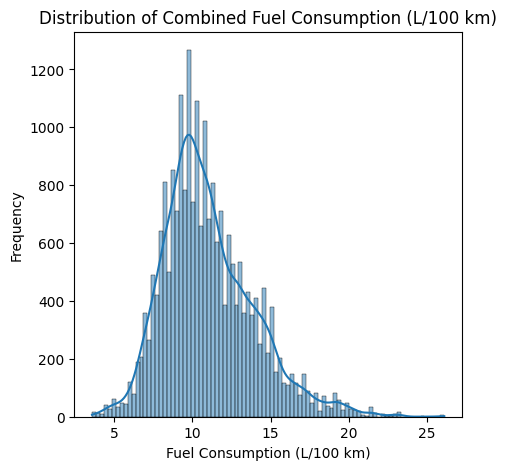

In [17]:
# Exploratory Data Analysis (EDA)

# Plotting the distribution of fuel consumption
plt.figure(figsize=(5, 5))
sns.histplot(df['COMB (L/100 km)'], kde=True)
plt.title('Distribution of Combined Fuel Consumption (L/100 km)')
plt.xlabel('Fuel Consumption (L/100 km)')
plt.ylabel('Frequency')
plt.show()

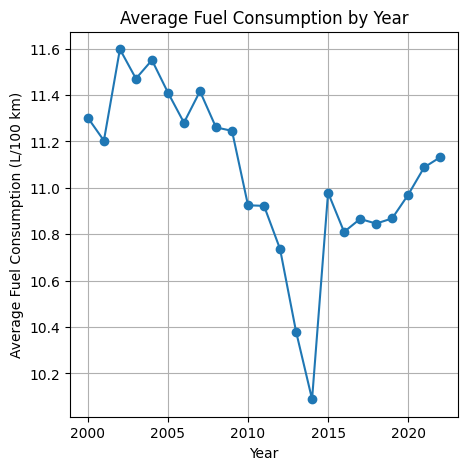

In [18]:
# Average fuel consumption by year
annual_fuel_consumption = df.groupby('YEAR')['COMB (L/100 km)'].mean()
plt.figure(figsize=(5, 5))
plt.plot(annual_fuel_consumption.index, annual_fuel_consumption.values, marker='o')
plt.title('Average Fuel Consumption by Year')
plt.xlabel('Year')
plt.ylabel('Average Fuel Consumption (L/100 km)')
plt.grid(True)
plt.show()

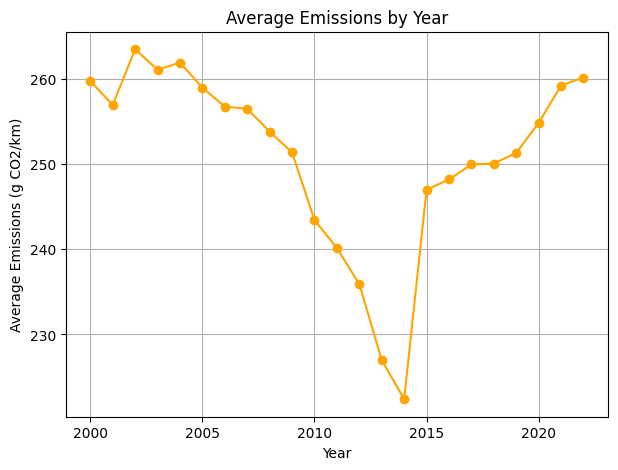

In [20]:
# Average emissions by year
annual_emissions = df.groupby('YEAR')['EMISSIONS'].mean()
plt.figure(figsize=(7, 5))
plt.plot(annual_emissions.index, annual_emissions.values, marker='o', color='orange')
plt.title('Average Emissions by Year')
plt.xlabel('Year')
plt.ylabel('Average Emissions (g CO2/km)')
plt.grid(True)
plt.show()

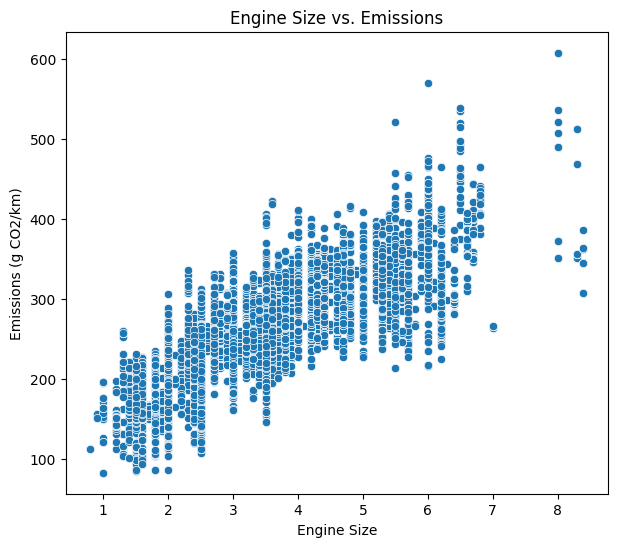

In [21]:
# Relationship between engine size and emissions
plt.figure(figsize=(7, 6))
sns.scatterplot(x='ENGINE SIZE', y='EMISSIONS', data=df)
plt.title('Engine Size vs. Emissions')
plt.xlabel('Engine Size')
plt.ylabel('Emissions (g CO2/km)')
plt.show()

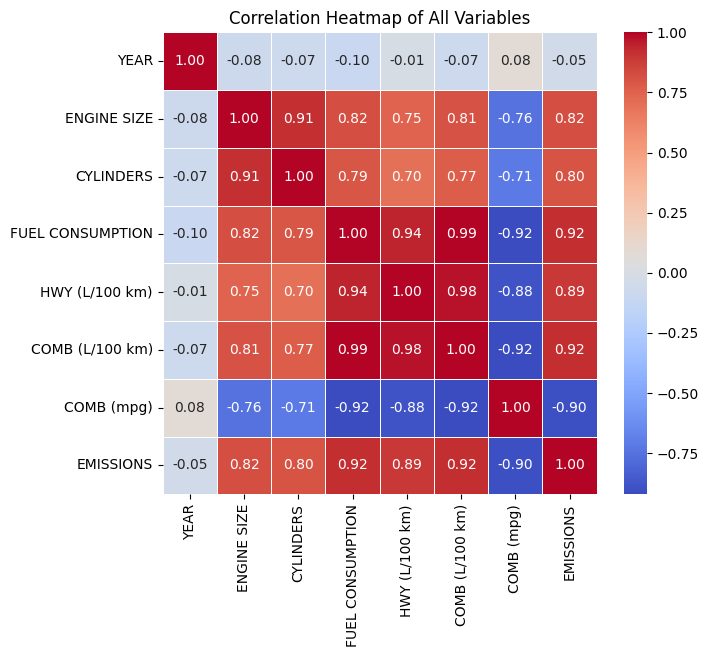

In [23]:
# Load the data
file_path = 'Fuel_Consumption_2000_2022.csv'  # Replace with the correct path if needed
df = pd.read_csv(file_path)

# Calculate the correlation matrix for all numerical variables
correlation_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(7, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of All Variables')
plt.show()

The correlation heatmap of all variables visually represents the strength and direction of relationships between pairs of numerical variables in the dataset. Here’s a breakdown of what it shows:

# Color Gradient:

Colors range from cool (often blue) to warm (often red or orange), indicating the correlation's strength.
Values close to +1 (warmer colors) indicate a strong positive correlation: as one variable increases, the other tends to increase as well.
Values close to -1 (cooler colors) indicate a strong negative correlation: as one variable increases, the other tends to decrease.
Values near 0 (neutral colors) suggest little to no correlation between variables.
Diagonal Line of 1.0 Values: Each variable correlates perfectly with itself, resulting in a correlation coefficient of +1 on the diagonal. These values are less informative for comparative purposes.

# Key Relationships:

Fuel Consumption and Emissions: Likely to have a high positive correlation, meaning vehicles with higher fuel consumption also tend to emit more CO₂.
Engine Size and Fuel Consumption/Emissions: Larger engine sizes may correlate positively with higher fuel consumption and emissions, suggesting that vehicles with larger engines are generally less fuel-efficient and more polluting.

In [24]:
# 1. Descriptive Statistics
print("Descriptive Statistics for Numeric Columns:")
print(df.describe())

Descriptive Statistics for Numeric Columns:
               YEAR   ENGINE SIZE     CYLINDERS  FUEL CONSUMPTION  \
count  22556.000000  22556.000000  22556.000000      22556.000000   
mean    2011.554442      3.356646      5.854141         12.763513   
std        6.298269      1.335425      1.819597          3.500999   
min     2000.000000      0.800000      2.000000          3.500000   
25%     2006.000000      2.300000      4.000000         10.400000   
50%     2012.000000      3.000000      6.000000         12.300000   
75%     2017.000000      4.200000      8.000000         14.725000   
max     2022.000000      8.400000     16.000000         30.600000   

       HWY (L/100 km)  COMB (L/100 km)    COMB (mpg)     EMISSIONS  
count    22556.000000     22556.000000  22556.000000  22556.000000  
mean         8.919126        11.034341     27.374534    250.068452  
std          2.274764         2.910920      7.376982     59.355276  
min          3.200000         3.600000     11.000000     8

Text(0.5, 0, 'Emissions (g CO2/km)')

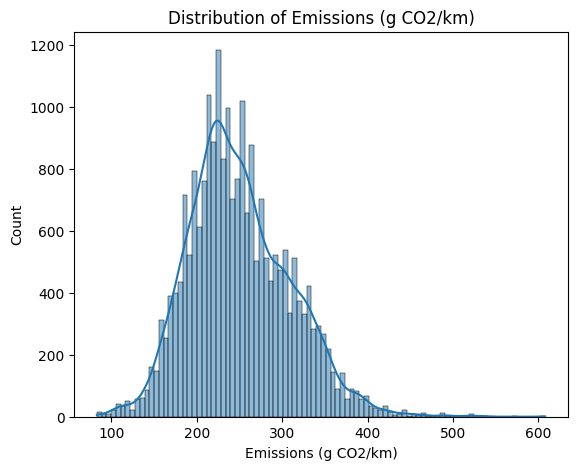

In [26]:
# 2. Checking Distribution of Key Variables
plt.figure(figsize=(14, 5))

# Emissions Distribution
plt.subplot(1, 2, 2)
sns.histplot(df['EMISSIONS'], kde=True)
plt.title('Distribution of Emissions (g CO2/km)')
plt.xlabel('Emissions (g CO2/km)')

In [27]:
# 3. Correlation Analysis
print("\nCorrelation Matrix:")
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)


Correlation Matrix:
                      YEAR  ENGINE SIZE  CYLINDERS  FUEL CONSUMPTION  \
YEAR              1.000000    -0.077782  -0.072607         -0.098631   
ENGINE SIZE      -0.077782     1.000000   0.913377          0.821605   
CYLINDERS        -0.072607     0.913377   1.000000          0.794943   
FUEL CONSUMPTION -0.098631     0.821605   0.794943          1.000000   
HWY (L/100 km)   -0.007471     0.749394   0.698344          0.942351   
COMB (L/100 km)  -0.068020     0.807316   0.771587          0.992960   
COMB (mpg)        0.079989    -0.755002  -0.714215         -0.921361   
EMISSIONS        -0.047869     0.821285   0.802176          0.919101   

                  HWY (L/100 km)  COMB (L/100 km)  COMB (mpg)  EMISSIONS  
YEAR                   -0.007471        -0.068020    0.079989  -0.047869  
ENGINE SIZE             0.749394         0.807316   -0.755002   0.821285  
CYLINDERS               0.698344         0.771587   -0.714215   0.802176  
FUEL CONSUMPTION        0.9423

In [29]:
# 4. Hypothesis Testing (Example)
# T-test to compare emissions of vehicles with above-median and below-median fuel consumption
median_fuel = df['COMB (L/100 km)'].median()
high_fuel_emissions = df[df['COMB (L/100 km)'] > median_fuel]['EMISSIONS']
low_fuel_emissions = df[df['COMB (L/100 km)'] <= median_fuel]['EMISSIONS']

In [31]:
# Import the necessary module
import scipy.stats as stats # Import the scipy.stats module and alias it as 'stats'

# Now you can use stats.ttest_ind
t_stat, p_value = stats.ttest_ind(high_fuel_emissions, low_fuel_emissions)
print("\nT-Test for Emissions between High and Low Fuel Consumption Vehicles:")
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")


T-Test for Emissions between High and Low Fuel Consumption Vehicles:
T-statistic: 182.43, P-value: 0.0000


In [32]:
# 5. Grouped Statistics (e.g., average emissions by vehicle class)
avg_emissions_by_class = df.groupby('VEHICLE CLASS')['EMISSIONS'].mean()
print("\nAverage Emissions by Vehicle Class:")
print(avg_emissions_by_class)


Average Emissions by Vehicle Class:
VEHICLE CLASS
COMPACT                     211.036798
Compact                     214.236253
FULL-SIZE                   260.942910
Full-size                   256.136691
MID-SIZE                    223.393478
MINICOMPACT                 231.690932
MINIVAN                     250.147541
Mid-size                    224.771212
Minicompact                 255.796209
Minivan                     251.952381
PICKUP TRUCK - SMALL        261.736973
PICKUP TRUCK - STANDARD     301.560687
Pickup truck: Small         280.064815
Pickup truck: Standard      303.145631
SPECIAL PURPOSE VEHICLE     229.500000
STATION WAGON - MID-SIZE    227.763848
STATION WAGON - SMALL       203.974220
SUBCOMPACT                  228.395125
SUV                         270.303030
SUV - SMALL                 227.504232
SUV - STANDARD              292.795720
SUV: Small                  232.855759
SUV: Standard               304.444079
Special purpose vehicle     236.016129
Station wagon

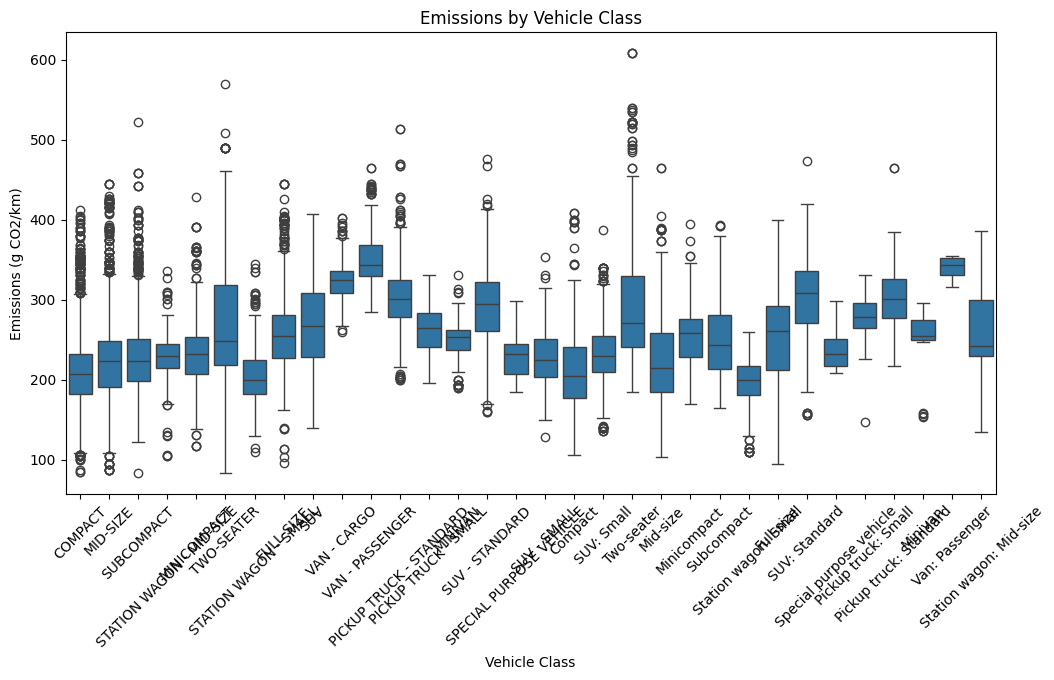

In [33]:
# Boxplot Comparison
plt.figure(figsize=(12, 6))
sns.boxplot(x='VEHICLE CLASS', y='EMISSIONS', data=df)
plt.title('Emissions by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Emissions (g CO2/km)')
plt.xticks(rotation=45)
plt.show()